## Observations and Insights 

Observations:
1.  Larger mice appear to have correspondingly larger tumors 
    (correlation between weight and tumor weight is .84)
2.  Capomulin outperformed all other regimens except Ramicane, which exhibited
    better average tumor size

In [274]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_df  #.columns

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [275]:
# Checking the number of mice in the DataFrame.
# Group by Mouse ID to give us the number of unique Mouse ID's in the DataFrame
unique_grp = merge_df.groupby("Mouse ID")
print(len(unique_grp.count()))

249


In [276]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Create dupes_df, which holds the duplicate Mouse ID 
# (and corresponding index) from the master set of data
dupes_df = merge_df[merge_df.duplicated(["Mouse ID","Timepoint"], keep=False)]
dupes_df["Mouse ID"]

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [277]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes_df.loc[908:917, :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [278]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Dropping g989 from data, based on "dropping the duplicate mouse by its id"
clean_df = merge_df[merge_df["Mouse ID"] != "g989"]

In [279]:
# Checking the number of mice in the clean DataFrame.
# The difference of 13 rows represents all rows for Mouse g989 (both duplicate and non duplicate rows)
print(len(clean_df))
print(len(merge_df))

1880
1893


## Summary Statistics

In [280]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# create a list of unique regimen values
regimen_df = clean_df.sort_values("Drug Regimen")
regimen_list = regimen_df["Drug Regimen"]
regimen_list = regimen_list.drop_duplicates()
#print(regimen_list)

# Create a dataframe with only the drug regimen and tumor volume for processing
regimen_df = pd.DataFrame({"Drug Regimen": clean_df["Drug Regimen"],
              "Tumor Volume (mm3)": clean_df["Tumor Volume (mm3)"]})

# Find mean tumor volume for each regimen
regimen_mean_df = regimen_df.sort_values("Drug Regimen")
regimen_mean_df = regimen_df.groupby('Drug Regimen').mean()
regimen_mean_list = regimen_mean_df["Tumor Volume (mm3)"]
#print(regimen_mean_list)

# Find median tumor volume for each regimen
regimen_med_df = regimen_df.sort_values("Drug Regimen")
regimen_med_df = regimen_df.groupby('Drug Regimen').median()
regimen_med_list = regimen_med_df["Tumor Volume (mm3)"]
#print(regimen_med_list)

# Find variance tumor volume for each regimen
regimen_var_df = regimen_df.sort_values("Drug Regimen")
regimen_var_df = regimen_df.groupby('Drug Regimen').var()
regimen_var_list = regimen_var_df["Tumor Volume (mm3)"]
#print(regimen_var_list)

# Find Standrad Deviation tumor volume for each regimen
regimen_std_df = regimen_df.sort_values("Drug Regimen")
regimen_std_df = regimen_df.groupby('Drug Regimen').std()
regimen_std_list = regimen_std_df["Tumor Volume (mm3)"]
#print(regimen_std_list)

# Find SEM tumor volume for each regimen
regimen_sem_df = regimen_df.sort_values("Drug Regimen")
regimen_sem_df = regimen_df.groupby('Drug Regimen').sem()
regimen_sem_list = regimen_sem_df["Tumor Volume (mm3)"]
#print(regimen_sem_list)


In [252]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
zippedlist = list(zip(regimen_list, 
                      regimen_mean_list, 
                      regimen_med_list, 
                      regimen_var_list, 
                      regimen_std_list, 
                      regimen_sem_list))
aggregate_df = pd.DataFrame(zippedlist, columns=["Drug Regimen",
                                                 "Mean Tumor Vol (mm3)",
                                                 "Median Tumor Vol (mm3)",
                                                 "Variance Tumor Vol (mm3)",
                                                 "STD Tumor Vol (mm3)",
                                                 "SEM Tumor Vol (mm3)"])
aggregate_df

,Drug Regimen,Mean Tumor Vol (mm3),Median Tumor Vol (mm3),Variance Tumor Vol (mm3),STD Tumor Vol (mm3),SEM Tumor Vol (mm3)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar Plots

Text(0, 0.5, 'Number of Mice per Drug Regimen')

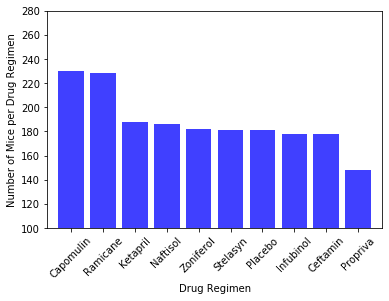

In [281]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pandas. 

#### Total # of datapoints for each treatment on y-axis
regimen_df = pd.DataFrame({"Drug Regimen": clean_df["Drug Regimen"],
                             "Mouse ID": clean_df["Mouse ID"]})

# Generate a count of mice per treatment (unique Mouse ID's)
regimen_count = regimen_df["Drug Regimen"].value_counts()
reg_count = regimen_count.reset_index().values.tolist()
regimen_count_df = pd.DataFrame(reg_count,
                               index=[0,1,2,3,4,5,6,7,8,9],
                               columns=["Drug Regimen","Count"])
#regimen_count_df

# Now create the bar graph.  
# x-axis:  Drug Regimen
# y-axis:  Count of mice per regimen (regimen_count)
x_axis = regimen_count_df["Drug Regimen"]
y_axis = regimen_count_df["Count"]
plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(100, max(y_axis)+50)
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice per Drug Regimen")


Text(0, 0.5, 'Number of Mice per Timepoint')

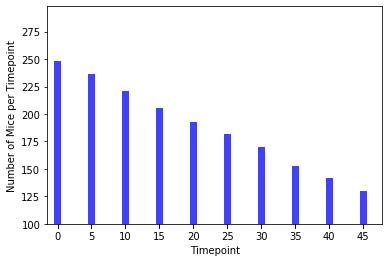

In [45]:
# Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study using pyplot.

#Generate a list of timepoints with number of mice
timepoint_df = pd.DataFrame({"Timepoint": clean_df["Timepoint"],
                             "Mouse ID": clean_df["Mouse ID"]})
#timepoint_df

# Generate a count of mice per timepoint (unique Mouse ID's)
timepoint_count = timepoint_df["Timepoint"].value_counts()
tp_count = timepoint_count.reset_index().values.tolist()
timepoint_count_df = pd.DataFrame(tp_count,
                               index=[0,1,2,3,4,5,6,7,8,9],
                               columns=["Timepoint","Count"])



# Now create the bar graph.  
# x_axis:  Timepoint
# y_axis:  Number of mice
x_axis = timepoint_count_df["Timepoint"]
y_axis = timepoint_count_df["Count"]

#tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [0,5,10,15,20,25,30,35,40,45])

plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center", width=1)
plt.xlim(-1.5)

plt.ylim(100, max(y_axis)+50)

plt.xlabel("Timepoint")
plt.ylabel("Number of Mice per Timepoint")

## Pie Plots

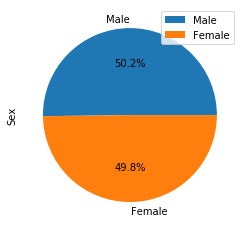

In [285]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Male list
male_df = merge_df[merge_df["Sex"] != "Female"]
male_df = male_df["Mouse ID"].drop_duplicates()
male_size = len(male_df)

# Female list
female_df = merge_df[merge_df["Sex"] != "Male"]
female_df = female_df["Mouse ID"].drop_duplicates()
female_size = len(female_df)

# Plot the graph
df = pd.DataFrame({"Sex": [male_size, female_size]},
                  index=['Male','Female'])
plot = df.plot.pie(y='Sex', autopct="%2.1f%%")
plt.show()

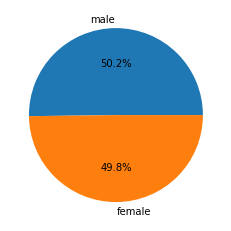

In [286]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(df["Sex"], labels=["male","female"], autopct="%2.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [287]:
# Calculate the final tumor volume of each mouse 
# across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# DF for mouse, treatment, max(time), tumor size
max_tumor_df = pd.DataFrame({"Drug Regimen": clean_df["Drug Regimen"],
                             "Mouse ID": clean_df["Mouse ID"],
                             "Timepoint": clean_df["Timepoint"],
                             "Tumor Volume (mm3)": clean_df["Tumor Volume (mm3)"]})
# Generate new dataframe with max values for all columns based on Mouse ID
max_tumor_group_df = max_tumor_df.groupby("Mouse ID").max()
max_tumor_tp = max_tumor_group_df.reset_index().values.tolist()

# New dataframe with Mouse ID, Drug Regimen, and Max Timepoint
max_tumor_tp_df = pd.DataFrame(max_tumor_tp, columns=["Mouse ID","Drug Regimen","Timepoint","Tumor Vol"])
del max_tumor_tp_df["Tumor Vol"]

# Now merge this with the original dataframe to get the tumor volume at the max timepoint
# This gives us the final tumor volume for each mouse at it's last timepoint
max_tumor_stats_df = pd.merge(max_tumor_tp_df, clean_df, on=["Mouse ID","Timepoint"], how="left")
tumor_final_summary_df = pd.DataFrame({"Mouse ID": max_tumor_stats_df["Mouse ID"],
                                      "Drug Regimen": max_tumor_stats_df["Drug Regimen_x"],
                                      "Timepoint": max_tumor_stats_df["Timepoint"],
                                      "Tumor Volume (mm3)": max_tumor_stats_df["Tumor Volume (mm3)"]})
#tumor_final_summary_df.head(50)

# calculate four of the most promising treatment regimens.
# find 4 drug treatments w/ smallest tumor volumes
# find 4 smallest tumor volumes, these are most promising treatments
tumor_final_summary_df.sort_values("Tumor Volume (mm3)").head(60)
#create df's for Ramicane, Capomulin, Infubinol, Ceftamin
ramicane_df = tumor_final_summary_df[tumor_final_summary_df["Drug Regimen"] == "Ramicane"]
capomulin_df = tumor_final_summary_df[tumor_final_summary_df["Drug Regimen"] == "Capomulin"]
infubinol_df = tumor_final_summary_df[tumor_final_summary_df["Drug Regimen"] == "Infubinol"]
ceftamin_df = tumor_final_summary_df[tumor_final_summary_df["Drug Regimen"] == "Ceftamin"]

ramicane = ramicane_df["Tumor Volume (mm3)"]
quartiles = ramicane.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane")
print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"     ")

capomulin = capomulin_df["Tumor Volume (mm3)"]
quartiles = capomulin.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin")
print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"     ")

infubinol = infubinol_df["Tumor Volume (mm3)"]
quartiles = infubinol.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol")
print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"     ")

ceftamin = ceftamin_df["Tumor Volume (mm3)"]
quartiles = ceftamin.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin")
print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"     ")


Ramicane
The lower quartile of tumor size is: 31.56046955
The upper quartile of tumor size is: 40.65900627
The interquartile range of tumor size is: 9.098536719999998
The the median of tumor size is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
     
Capomulin
The lower quartile of tumor size is: 32.37735684
The upper quartile of tumor size is: 40.1592203
The interquartile range of tumor size is: 7.781863460000004
The the median of tumor size is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
     
Infubinol
The lower quartile of tumor size is: 54.04860769
The upper quartile of tumor size is: 65.52574285
The interquartile range of tumor size is: 11.477135160000003
The the median of tumor size is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
     
Ceftamin
The lower quartile of tumor size is:

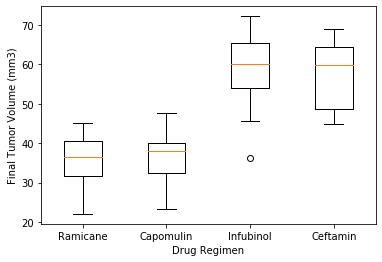

In [204]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drugs_to_plot = [ramicane, capomulin, infubinol, ceftamin]
labels = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(drugs_to_plot, labels=labels)

plt.show()

## Line and Scatter Plots

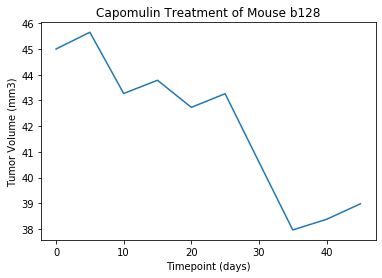

In [288]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

b128_df = merge_df[merge_df["Mouse ID"] == "b128"]
x_axis = b128_df["Timepoint"]
y_axis = b128_df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128");

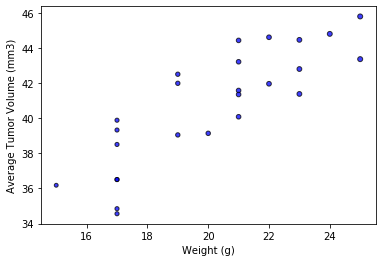

In [289]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = merge_df[merge_df["Drug Regimen"] == "Capomulin"]
scatter_df = pd.DataFrame({"Mouse ID": capomulin_df["Mouse ID"],
                          "Weight (g)": capomulin_df["Weight (g)"],
                          "Tumor Volume (mm3)": capomulin_df["Tumor Volume (mm3)"]})
mouse_group = scatter_df.groupby(["Mouse ID"])
mouse_group_avg = mouse_group.mean()

x_axis = mouse_group_avg["Weight (g)"]
y_axis = mouse_group_avg["Tumor Volume (mm3)"]
x_limit = 30
y_limit = 50

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", s=x_axis, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation between Weight and Tumor Volume is 0.84


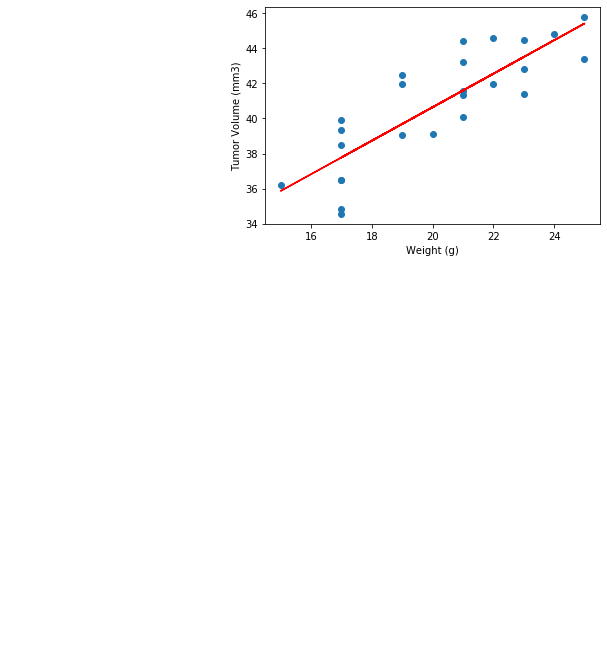

In [290]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = mouse_group_avg.iloc[:,0]
tumor = mouse_group_avg.iloc[:,1]
correlation = st.pearsonr(weight, tumor)
print(f"The correlation between Weight and Tumor Volume is {round(correlation[0],2)}")

# Add linear regression model
x_values = mouse_group_avg['Weight (g)']
y_values = mouse_group_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()